# scikit-learn库

scikit-learn已经封装好很多数据挖掘的算法

现介绍数据挖掘框架的搭建方法
- 转换器（Transformer）用于数据预处理，数据转换
- 流水线（Pipeline）组合数据挖掘流程，方便再次使用（封装）
- 估计器（Estimator）用于分类，聚类，回归分析（各种算法对象）
  - 所有的估计器都有下面2个函数
    - fit() 训练
      - 用法：estimator.fit(X_train, y_train)，
      - estimator = KNeighborsClassifier() 是scikit-learn算法对象
      - X_train = dataset.data 是numpy数组
      - y_train = dataset.target 是numpy数组
    - predict() 预测
      - 用法：estimator.predict(X_test)
      - estimator = KNeighborsClassifier() 是scikit-learn算法对象
      - X_test = dataset.data 是numpy数组


In [1]:
%matplotlib inline
# Ionosphere数据集
# https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/
# 下载ionosphere.data和ionosphere.names文件，放在 ./data/Ionosphere/ 目录下
import os
home_folder = os.path.expanduser("~")
print(home_folder) # home目录
# Change this to the location of your dataset
home_folder = "." # 改为当前目录
data_folder = os.path.join(home_folder, "data")
print(data_folder)
data_filename = os.path.join(data_folder, "ionosphere.data")
print(data_filename)
import csv
import numpy as np

/home/dlinking-lxy
./data
./data/ionosphere.data


In [2]:
# Size taken from the dataset and is known已知数据集形状
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')


with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        # Set the appropriate row in our dataset用真实数据覆盖掉初始化的0
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g' # 相当于if row[-1]=='g': y[i]=1 else: y[i]=0


In [3]:
# 数据预处理
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("训练集数据有 {} 条".format(X_train.shape[0]))
print("测试集数据有 {} 条".format(X_test.shape[0]))
print("每条数据有 {} 个features".format(X_train.shape[1]))

训练集数据有 263 条
测试集数据有 88 条
每条数据有 34 个features


/home/dlinking-lxy/more-space/pyworks/venv/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# 实例化算法对象->训练->预测->评价
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
estimator.fit(X_train, y_train)
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("准确率 {0:.1f}%".format(accuracy))

# 其他评价方式
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("平均准确率 {0:.1f}%".format(average_accuracy))

avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

准确率 86.4%
平均准确率 82.3%


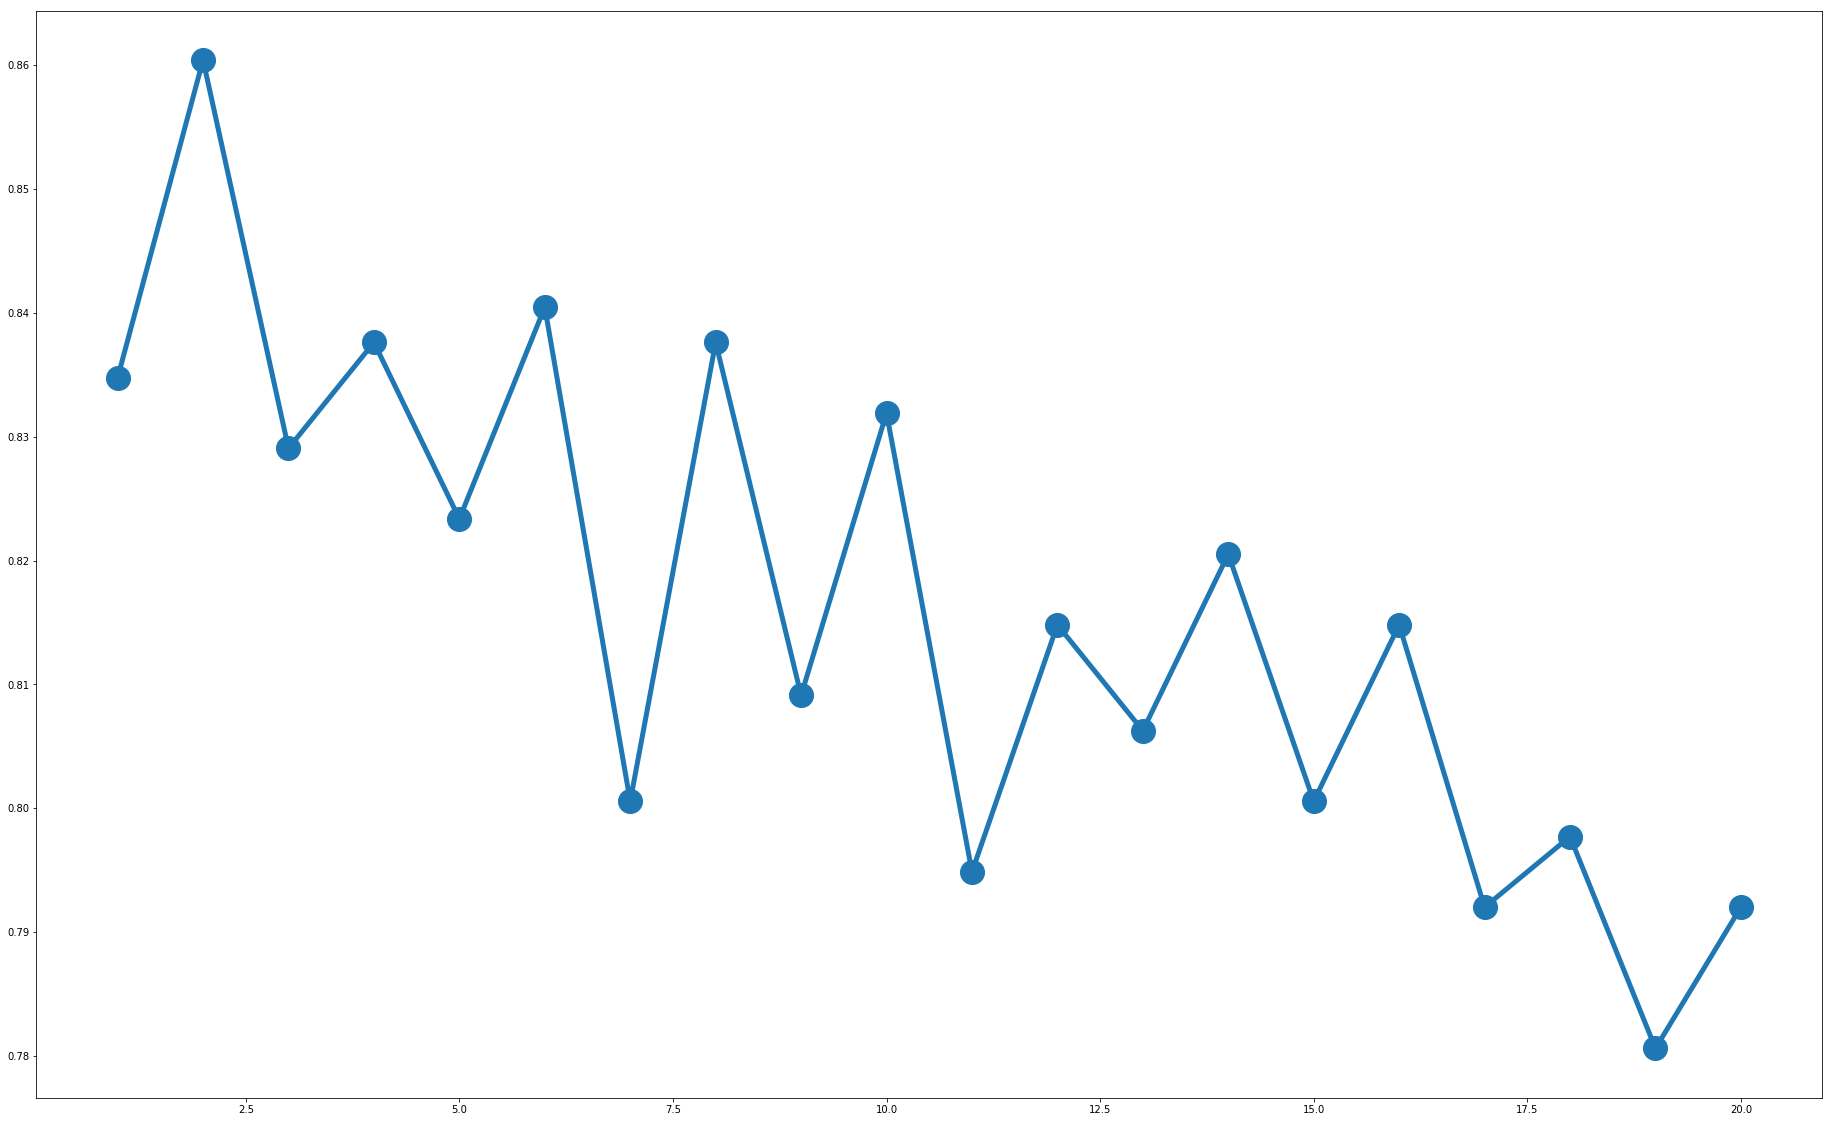

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])

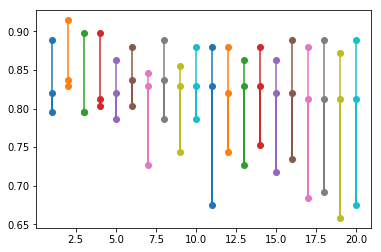

In [6]:
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

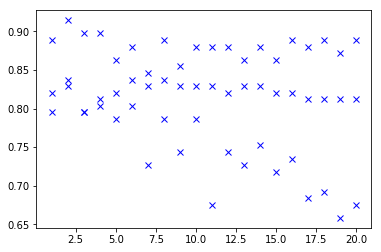

In [7]:
plt.plot(parameter_values, all_scores, 'bx')

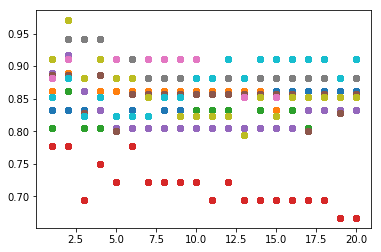

In [8]:
from collections import defaultdict
all_scores = defaultdict(list)
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    for i in range(100):
        estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=10)
        all_scores[n_neighbors].append(scores)
for parameter in parameter_values:
    scores = all_scores[parameter]
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

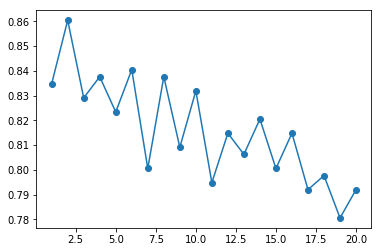

In [9]:
plt.plot(parameter_values, avg_scores, '-o')

In [10]:
from sklearn.preprocessing import MinMaxScaler